<a href="https://colab.research.google.com/github/sydstewart/Orders/blob/main/Olin_Wellesley_Bikeshare.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
# install Pint if necessary

try:
    import pint
except ImportError:
    !pip install pint

# download modsim.py if necessary

from os.path import basename, exists

def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve
        local, _ = urlretrieve(url, filename)
        print('Downloaded ' + local)
    
download('https://raw.githubusercontent.com/AllenDowney/' +
         'ModSimPy/master/modsim.py')


0
1
2
Moving a bike to Wellesley
3
Moving a bike to Wellesley
Moving a bike to Olin
4
Moving a bike to Wellesley
5
Moving a bike to Wellesley
6
Moving a bike to Wellesley
Moving a bike to Olin
7
Moving a bike to Wellesley
8
Moving a bike to Wellesley
9
10
Moving a bike to Wellesley
11
Moving a bike to Olin
12
Moving a bike to Wellesley
Moving a bike to Olin
13
14
15
Moving a bike to Wellesley
Moving a bike to Olin
16
17
Moving a bike to Wellesley
18
19
Moving a bike to Wellesley
Moving a bike to Olin
20
Moving a bike to Wellesley
21
22
23
Moving a bike to Wellesley
24
25
Moving a bike to Olin
26
Moving a bike to Wellesley
27
Moving a bike to Wellesley
28
Moving a bike to Wellesley
29
Moving a bike to Wellesley
30
Moving a bike to Olin
31
Moving a bike to Wellesley
32
Moving a bike to Olin
33
Moving a bike to Wellesley
34
Moving a bike to Olin
35
Moving a bike to Olin
36
37
Moving a bike to Wellesley
38
Moving a bike to Wellesley
Moving a bike to Olin
39
40
Moving a bike to Olin
41
Movi

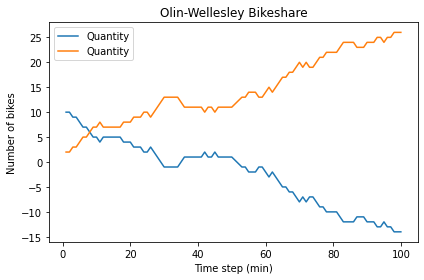

In [17]:
# import functions from modsim

from modsim import *

bikeshare = State(olin=10, wellesley=2)
show(bikeshare)

def bike_to_wellesley():
    print('Moving a bike to Wellesley')
    bikeshare.olin -= 1
    bikeshare.wellesley += 1

def bike_to_olin():
    print('Moving a bike to Olin')
    bikeshare.wellesley -= 1
    bikeshare.olin += 1

def step(p1, p2):
    if flip(p1):
        bike_to_wellesley()
    
    if flip(p2):
        bike_to_olin()

results = TimeSeries()
results0 =TimeSeries()

for i in range(100):
    print(i)
    step(0.6, 0.4)
    if bikeshare.olin != 0:
        results[i+1] = bikeshare.olin
        results0[i+1] = bikeshare.wellesley

results.plot()
decorate(title='Olin-Wellesley Bikeshare',
         xlabel='Time step (min)', 
         ylabel='Number of bikes')

results0.plot()
decorate(title='Olin-Wellesley Bikeshare',
         xlabel='Time step (min)', 
         ylabel='Number of bikes')